In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\PURWADHIKA\MODUL 03\PRACTICES\TEST\bank.csv',index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
## Checking for missing value
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
##Checking Outliers
#First, I separate of categorical or object and numerical data types (int64 & float64)
#This separation is done to check the outliers in the numeric column using the boxplot

numeric_col = []
categorical_col = []
for i in df.columns:
    #categorical columns
    if df[i].dtype == 'object':
        categorical_col.append(i)
    else:
        #numeric columns
        numeric_col.append(i)
        
print('Numerical Columns ({})'.format(len(numeric_col)))
print(numeric_col)
print('-'*100)
print('Categorical Columns ({})'.format(len(categorical_col)))
print(categorical_col)

Numerical Columns (10)
['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
----------------------------------------------------------------------------------------------------
Categorical Columns (3)
['Surname', 'Geography', 'Gender']


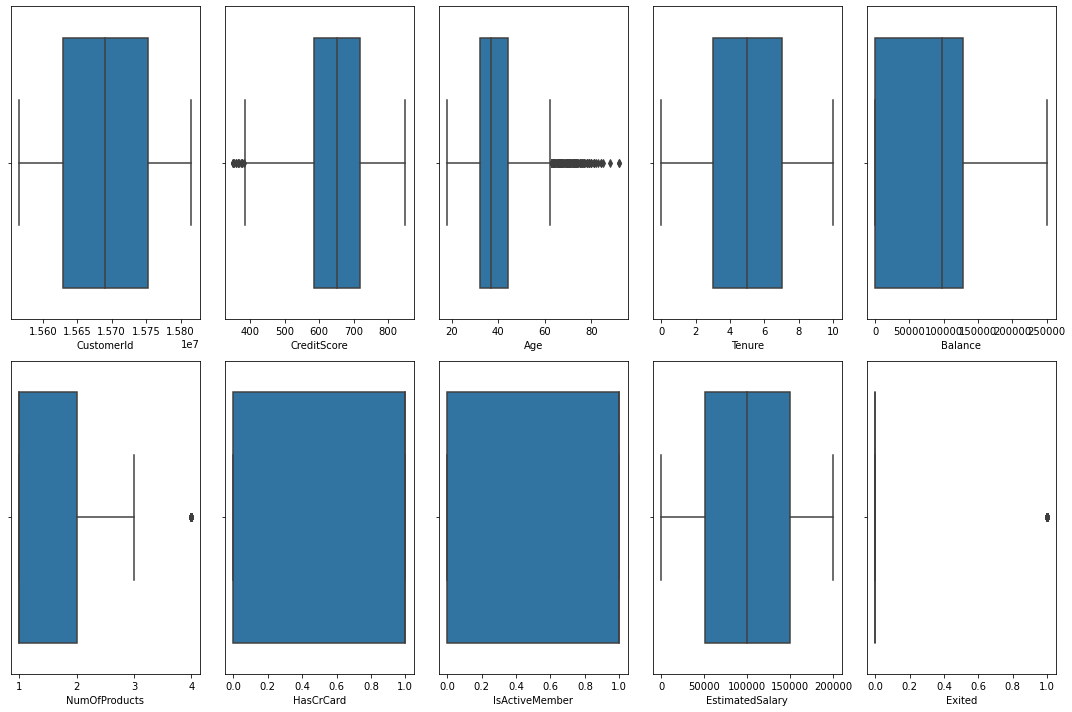

In [6]:
## Boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_col):
    plt.subplot(2,5,i+1)
    sns.boxplot(df[col])
    plt.tight_layout()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [8]:
df.describe(include='O').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [9]:
bankDESC = []

for i in df.columns:
    bankDESC.append([
    i,
    df[i].dtypes,
    df[i].isna().sum(),
    (((df[i].isna().sum())/len(df))*100).round(2),
    df[i].nunique(),
    df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data=bankDESC, columns=['feature_name', 'type', 'Null', 'Percentage Null', 'No Unique', 'Example Unique'])

,feature_name,type,Null,Percentage Null,No Unique,Example Unique
0,CustomerId,int64,0,0.0,10000,"[15651958, 15752344]"
1,Surname,object,0,0.0,2932,"[Caffyn, Yost]"
2,CreditScore,int64,0,0.0,460,"[718, 786]"
3,Geography,object,0,0.0,3,"[Spain, France]"
4,Gender,object,0,0.0,2,"[Female, Male]"
5,Age,int64,0,0.0,70,"[74, 55]"
6,Tenure,int64,0,0.0,11,"[1, 3]"
7,Balance,float64,0,0.0,6382,"[112333.63, 44301.43]"
8,NumOfProducts,int64,0,0.0,4,"[3, 4]"
9,HasCrCard,int64,0,0.0,2,"[0, 1]"


In [10]:
df.corr()['Exited'].sort_values(ascending=False)[1:]

Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

### Data Analyst & Visualization

### `Exited`

In [11]:
df.stb.freq(['Exited'])

,Exited,count,percent,cumulative_count,cumulative_percent
0,0,7963,79.63,7963,79.63
1,1,2037,20.37,10000,100.00


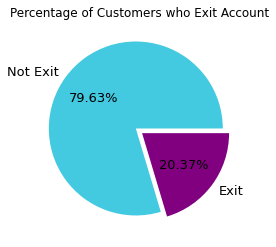

In [13]:
#Here are visualization of Response using pie chart
percentage = [79.63, 20.37]
label = ['Not Exit', 'Exit']

plt.pie( percentage, labels=label,
        colors=[ '#43c9e0', 'purple'],
        startangle=0,
        textprops ={
            'size': 13,
            'color':'black'
        },
        autopct='%1.2f%%',
        radius=1,
        explode=(.05, .04)
)
plt.title('Percentage of Customers who Exit Account')
# plt.savefig('D:\\PURWADHIKA\\MODUL 03\\PICTURES\\Response_Percent.png')
plt.show()

### `Surname`

In [14]:
## 10 Surname of Customers that has highest percentage 
df.stb.freq(['Surname']).head(10)

,Surname,count,percent,cumulative_count,cumulative_percent
0,Smith,32,0.32,32,0.32
1,Scott,29,0.29,61,0.61
2,Martin,29,0.29,90,0.90
3,Walker,28,0.28,118,1.18
4,Brown,26,0.26,144,1.44
5,Yeh,25,0.25,169,1.69
6,Shih,25,0.25,194,1.94
7,Genovese,25,0.25,219,2.19
8,Wright,24,0.24,243,2.43
9,Maclean,24,0.24,267,2.67


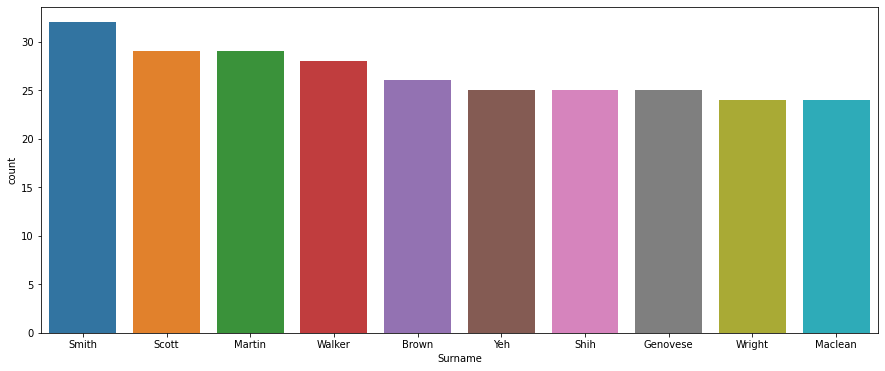

In [16]:
#This code aim to know ten surname that has high frequency appeared
df_surname = df.stb.freq(['Surname']).head(10)
plt.figure(figsize=(15,6))
sns.barplot(x=df_surname['Surname'], y=df_surname['count'])
plt.show()

### `Age`

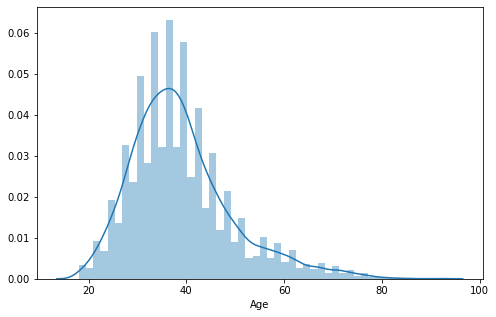

In [17]:
## This code aim to know the distribution of Age customers
plt.figure(figsize=(8,5))
sns.distplot(df['Age'])
plt.show()

In [19]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [20]:
## Binning feature Age
bin_age=[18, 25, 35, 45, 55, 65, 92] #range kelompok (18-25, 26-35, 36-45, 46-55, 56-65, 66-92)
label = ['Remaja', 'Dewasa Awal', 'Dewasa Akhir', 'Lansia Awal', 'Lansia Akhir', 'Manula']
df['age_bin'] = pd.cut(df['Age'], bins=bin_age, labels=label)

In [24]:
## sidetable
df.stb.freq(['age_bin'])

,age_bin,count,percent,cumulative_count,cumulative_percent
0,Dewasa Akhir,3736,37.442373,3736,37.442373
1,Dewasa Awal,3542,35.498096,7278,72.940469
2,Lansia Awal,1311,13.138906,8589,86.079375
3,Remaja,589,5.902987,9178,91.982361
4,Lansia Akhir,536,5.371818,9714,97.354179
5,Manula,264,2.645821,9978,100.000000


In [33]:
((pd.crosstab(index=df['age_bin'], columns=df['Exited'],normalize='index', margins=True))*100).round(2)

Exited,0,1
age_bin,,
Remaja,92.53,7.47
Dewasa Awal,91.50,8.50
Dewasa Akhir,80.38,19.62
Lansia Awal,49.43,50.57
Lansia Akhir,51.68,48.32
Manula,86.74,13.26
All,79.61,20.39


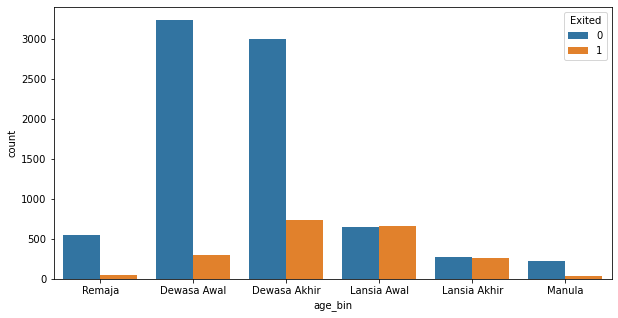

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(df['age_bin'], hue=df['Exited'])
plt.show()

- Range age that has highest percentage of exit account from bank is **Lansia Awal (50.57) followed by Lansia Akhir (48.32)**


### `Balance`

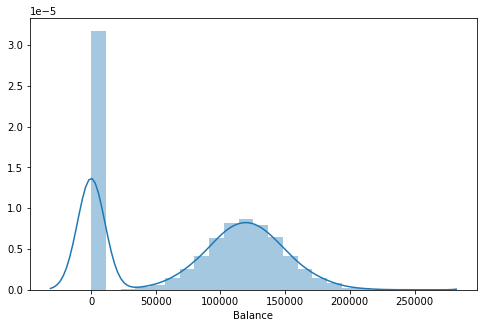

In [35]:
## This code aim to know the distribution of Balance customers
plt.figure(figsize=(8,5))
sns.distplot(df['Balance'])
plt.show()

In [36]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [37]:
## Binning feature Balance
bin_balance=[0, 97198.54, 250898.09] #range kelompok (0-97198.54, 98198.54-250898.09)
label = ['Low Balance', 'High Balance']
df['balance_bin'] = pd.cut(df['Balance'], bins=bin_balance, labels=label)

In [38]:
((pd.crosstab(index=df['balance_bin'], columns=df['Exited'],normalize='index', margins=True))*100).round(2)

Exited,0,1
balance_bin,,
Low Balance,79.18,20.82
High Balance,75.02,24.98
All,75.92,24.08


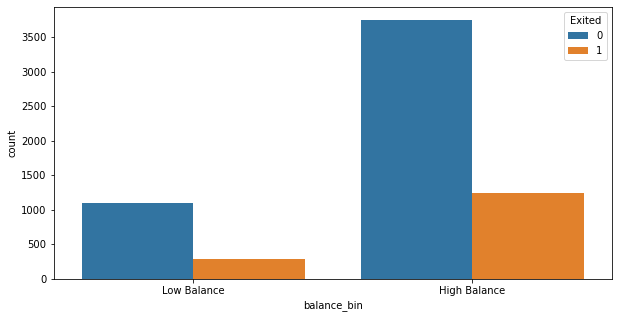

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(df['balance_bin'], hue=df['Exited'])
plt.show()

- Customers who has high balance tend to exit account with percentage around 24.98%

### `CreditScore`

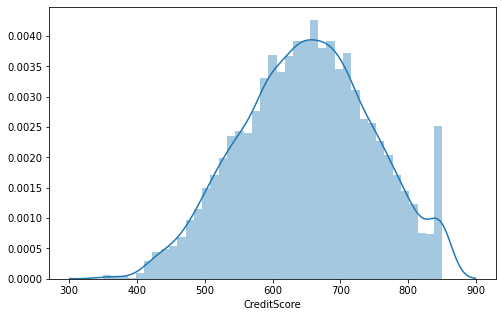

In [41]:
## This code aim to know the distribution of CreditScore customers
plt.figure(figsize=(8,5))
sns.distplot(df['CreditScore'])
plt.show()

In [42]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [43]:
## Binning feature CreditScore
bin_creditscore=[350, 629, 689, 719, 850] #range kelompok (350-629, 630-689, 690-719, 720-850)
label = ['Bad', 'Fair', 'Good', 'Excellent']
df['CreditScore_bin'] = pd.cut(df['CreditScore'], bins=bin_creditscore, labels=label)

In [44]:
((pd.crosstab(index=df['CreditScore_bin'], columns=df['Exited'],normalize='index', margins=True))*100).round(2)

Exited,0,1
CreditScore_bin,,
Bad,78.37,21.63
Fair,81.12,18.88
Good,81.41,18.59
Excellent,79.68,20.32
All,79.67,20.33


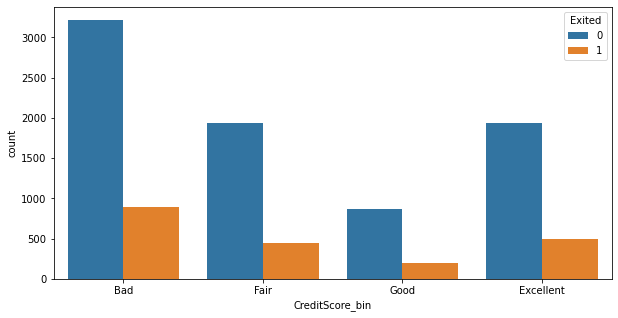

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(df['CreditScore_bin'], hue=df['Exited'])
plt.show()

- Customers with **Excellent Credit Score** has highest percentage of exit account

### `Geography`

In [47]:
df.stb.freq(['Geography'])

,Geography,count,percent,cumulative_count,cumulative_percent
0,France,5014,50.14,5014,50.14
1,Germany,2509,25.09,7523,75.23
2,Spain,2477,24.77,10000,100.00


In [49]:
((pd.crosstab(index=df['Geography'], columns=df['Exited'],normalize='index', margins=True))*100).round(2)

Exited,0,1
Geography,,
France,83.85,16.15
Germany,67.56,32.44
Spain,83.33,16.67
All,79.63,20.37


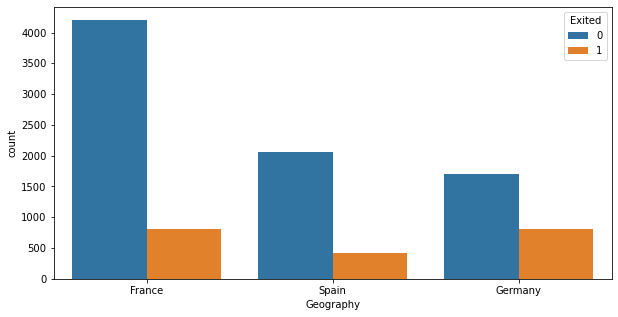

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(df['Geography'], hue=df['Exited'])
plt.show()

- Germany has the highest percentage of exit account with percentage around 32.44%

### `Gender`

In [51]:
df.stb.freq(['Gender'])

,Gender,count,percent,cumulative_count,cumulative_percent
0,Male,5457,54.57,5457,54.57
1,Female,4543,45.43,10000,100.00


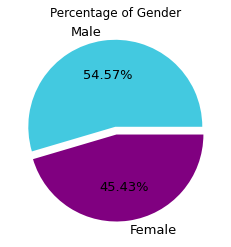

In [52]:
#Here are visualization of Response using pie chart
percentage = [54.57, 45.43]
label = ['Male', 'Female']

plt.pie( percentage, labels=label,
        colors=[ '#43c9e0', 'purple'],
        startangle=0,
        textprops ={
            'size': 13,
            'color':'black'
        },
        autopct='%1.2f%%',
        radius=1,
        explode=(.05, .04)
)
plt.title('Percentage of Gender')
# plt.savefig('D:\\PURWADHIKA\\MODUL 03\\PICTURES\\Response_Percent.png')
plt.show()

In [53]:
((pd.crosstab(index=df['Gender'], columns=df['Exited'],normalize='index', margins=True))*100).round(2)

Exited,0,1
Gender,,
Female,74.93,25.07
Male,83.54,16.46
All,79.63,20.37


In [55]:
#This code aim to make a DataFrame to visualize
gender = {
    'NotExit' : [74.93, 83.54],
    'Exit' : [25.07, 16.46],
    'Gender':['Female', 'Male']
}
pd.DataFrame(data=gender)

,NotExit,Exit,Gender
0,74.93,25.07,Female
1,83.54,16.46,Male


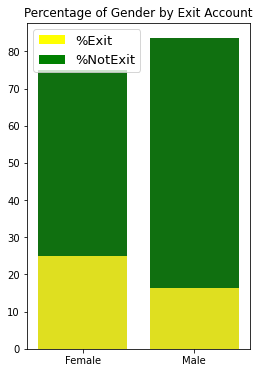

In [70]:
#Here are the visualize of percentage of Gender & Exited using stacked bar
plt.figure(figsize=(4,6))
#plot 1 - backgroud - NotExit
sns.barplot(x=gender['Gender'], y=gender['NotExit'], color='green')

#plot 2 - Exit
sns.barplot(x=gender['Gender'], y=gender['Exit'], color='yellow')

#Setting the legend
topbar = plt.Rectangle((0,0),1,1,fc="green", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='yellow',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['%Exit', '%NotExit'], loc='upper left', ncol = 1, prop={'size':13})

plt.title('Percentage of Gender by Exit Account')
# plt.savefig('D:\\PURWADHIKA\\MODUL 02\\PICTURES\\JobInvolvement.png')
plt.show()

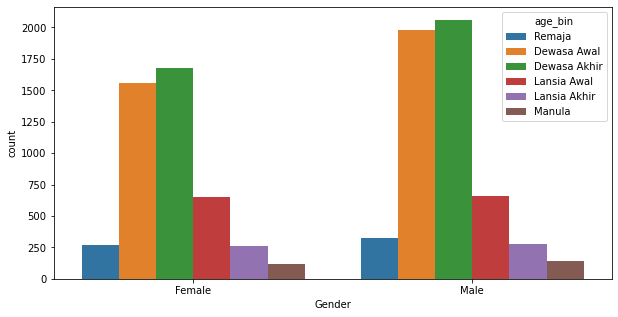

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(df['Gender'], hue=df['age_bin'])
plt.show()

- female has higher percentage of Exit Acount around 25.07%

### `Tenure`

In [63]:
df.stb.freq(['Tenure'])

,Tenure,count,percent,cumulative_count,cumulative_percent
0,2,1048,10.48,1048,10.48
1,1,1035,10.35,2083,20.83
2,7,1028,10.28,3111,31.11
3,8,1025,10.25,4136,41.36
4,5,1012,10.12,5148,51.48
5,3,1009,10.09,6157,61.57
6,4,989,9.89,7146,71.46
7,9,984,9.84,8130,81.30
8,6,967,9.67,9097,90.97
9,10,490,4.90,9587,95.87


In [67]:
((pd.crosstab(index=df['Tenure'], columns=df['Exited'],normalize='index', margins=True))*100).round(2).T

Tenure,0,1,2,3,4,5,6,7,8,9,10,All
Exited,,,,,,,,,,,,
0,77.0,77.58,80.82,78.89,79.47,79.35,79.73,82.78,80.78,78.35,79.39,79.63
1,23.0,22.42,19.18,21.11,20.53,20.65,20.27,17.22,19.22,21.65,20.61,20.37


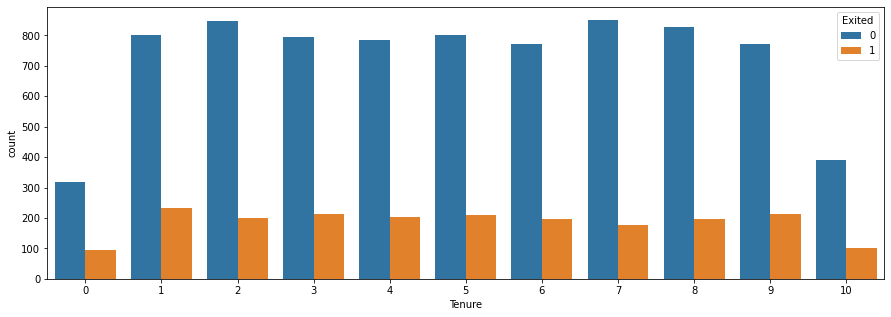

In [65]:
plt.figure(figsize=(15,5))
sns.countplot(df['Tenure'], hue=df['Exited'])
plt.show()

- Customers with 0 tenure has highest percentage of Exit account around 23%

### `NumOfProducts`

In [69]:
df.stb.freq(['NumOfProducts'])

,NumOfProducts,count,percent,cumulative_count,cumulative_percent
0,1,5084,50.84,5084,50.84
1,2,4590,45.90,9674,96.74
2,3,266,2.66,9940,99.40
3,4,60,0.60,10000,100.00


In [72]:
((pd.crosstab(index=df['NumOfProducts'], columns=df['Exited'],normalize='index', margins=True))*100).round(2)

Exited,0,1
NumOfProducts,,
1,72.29,27.71
2,92.42,7.58
3,17.29,82.71
4,0.00,100.00
All,79.63,20.37


- Suprisingly for NumOfProducts 4 has 100% of Exit account. its mean that all customers with this NumOfProducts exit account

### `HasCrCard`

In [74]:
df.stb.freq(['HasCrCard'])

,HasCrCard,count,percent,cumulative_count,cumulative_percent
0,1,7055,70.55,7055,70.55
1,0,2945,29.45,10000,100.00


In [75]:
((pd.crosstab(index=df['HasCrCard'], columns=df['Exited'],normalize='index', margins=True))*100).round(2)

Exited,0,1
HasCrCard,,
0,79.19,20.81
1,79.82,20.18
All,79.63,20.37


In [76]:
#This code aim to make a DataFrame to visualize
card = {
    'NotExit' : [79.19, 79.82],
    'Exit' : [20.81, 20.18],
    'HasCrcard':['No', 'Yes']
}
pd.DataFrame(data=card)

,NotExit,Exit,HasCrcard
0,79.19,20.81,No
1,79.82,20.18,Yes


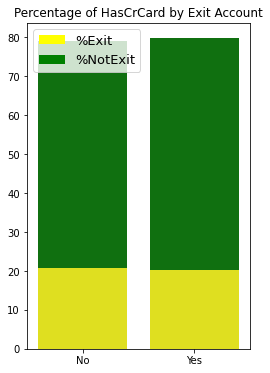

In [77]:
#Here are the visualize of percentage of Gender & Exited using stacked bar
plt.figure(figsize=(4,6))
#plot 1 - backgroud - NotExit
sns.barplot(x=card['HasCrcard'], y=card['NotExit'], color='green')

#plot 2 - Exit
sns.barplot(x=card['HasCrcard'], y=card['Exit'], color='yellow')

#Setting the legend
topbar = plt.Rectangle((0,0),1,1,fc="green", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='yellow',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['%Exit', '%NotExit'], loc='upper left', ncol = 1, prop={'size':13})

plt.title('Percentage of HasCrCard by Exit Account')
# plt.savefig('D:\\PURWADHIKA\\MODUL 02\\PICTURES\\JobInvolvement.png')
plt.show()

- whether the customers has credit Card or no, they have same percentage of exit account

### `IsActiveMember`

In [79]:
df.stb.freq(['IsActiveMember'])

,IsActiveMember,count,percent,cumulative_count,cumulative_percent
0,1,5151,51.51,5151,51.51
1,0,4849,48.49,10000,100.00


In [80]:
((pd.crosstab(index=df['IsActiveMember'], columns=df['Exited'],normalize='index', margins=True))*100).round(2)

Exited,0,1
IsActiveMember,,
0,73.15,26.85
1,85.73,14.27
All,79.63,20.37


In [82]:
#This code aim to make a DataFrame to visualize
member = {
    'NotExit' : [73.15, 85.73],
    'Exit' : [26.85, 14.27],
    'isactivemember':['No', 'Yes']
}
pd.DataFrame(data=member)

,NotExit,Exit,isactivemember
0,73.15,26.85,No
1,85.73,14.27,Yes


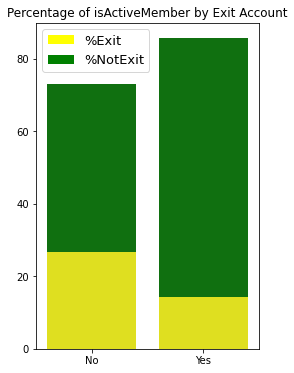

In [84]:
#Here are the visualize of percentage of Gender & Exited using stacked bar
plt.figure(figsize=(4,6))
#plot 1 - backgroud - NotExit
sns.barplot(x=member['isactivemember'], y=member['NotExit'], color='green')

#plot 2 - Exit
sns.barplot(x=member['isactivemember'], y=member['Exit'], color='yellow')

#Setting the legend
topbar = plt.Rectangle((0,0),1,1,fc="green", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='yellow',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['%Exit', '%NotExit'], loc='upper left', ncol = 1, prop={'size':13})

plt.title('Percentage of isActiveMember by Exit Account')
# plt.savefig('D:\\PURWADHIKA\\MODUL 02\\PICTURES\\JobInvolvement.png')
plt.show()

- Customers that is not active member tend to exit account with percentage aroung 26.85%

### `EstimatedSalary`

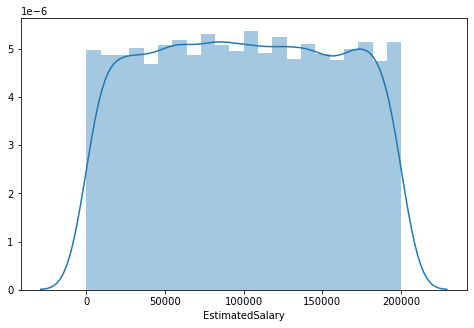

In [86]:
## This code aim to know the distribution of EstimatedSalary customers
plt.figure(figsize=(8,5))
sns.distplot(df['EstimatedSalary'])
plt.show()

In [87]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [88]:
## Binning feature EstimatedSalary
bin_salary=[11.58, 100193.915, 199992.48] 
label = ['Low salary', 'High salary']
df['salary_bin'] = pd.cut(df['EstimatedSalary'], bins=bin_salary, labels=label)

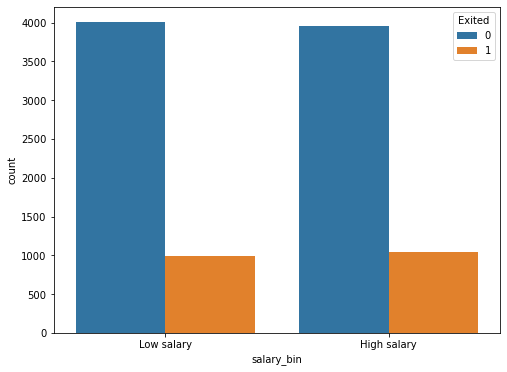

In [89]:
plt.figure(figsize=(8,6))
sns.countplot(df['salary_bin'], hue=df['Exited'])

In [90]:
((pd.crosstab(index=df['salary_bin'], columns=df['Exited'],normalize='index', margins=True))*100).round(2)

Exited,0,1
salary_bin,,
Low salary,80.12,19.88
High salary,79.16,20.84
All,79.64,20.36


- Customers with high salary tend to exit account